## Readme: 

In the first worksheet “Protein fold changes” you find the proteins which showed a significant change (columns AE-AI, expressed as fold change compared to sample 1).The protein information is in column AO.

- AE-AI: 
- 'Ratio 1(TMT10-126; TMT10-127N)',
- 'Ratio 11(TMT10-127C; TMT10-128N)', 
- 'Ratio 32(TMT10-128C; TMT10-129N)',
- 'Ratio 39(TMT10-129C; TMT10-130N)', 
- 'Ratio 40(TMT10-130C; TMT10-131)'

In [6]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np

In [2]:
data=pd.read_excel("../data/raw/MP_CDR_ES16072021_TMT10plex_v01.xlsx",engine='openpyxl')

In [3]:
data.columns

Index(['Protein Group', 'Protein ID', 'Accession', 'Significance', '-10lgP',
       'Intensity TMT10-126', 'Intensity TMT10-127N', 'Intensity TMT10-127C',
       'Intensity TMT10-128N', 'Intensity TMT10-128C', 'Intensity TMT10-129N',
       'Intensity TMT10-129C', 'Intensity TMT10-130N', 'Intensity TMT10-130C',
       'Intensity TMT10-131', 'Ratio TMT10-126', 'Ratio TMT10-127N',
       'Ratio TMT10-127C', 'Ratio TMT10-128N', 'Ratio TMT10-128C',
       'Ratio TMT10-129N', 'Ratio TMT10-129C', 'Ratio TMT10-130N',
       'Ratio TMT10-130C', 'Ratio TMT10-131',
       'Intensity 1(TMT10-126; TMT10-127N)',
       'Intensity 11(TMT10-127C; TMT10-128N)',
       'Intensity 32(TMT10-128C; TMT10-129N)',
       'Intensity 39(TMT10-129C; TMT10-130N)',
       'Intensity 40(TMT10-130C; TMT10-131)', 'Ratio 1(TMT10-126; TMT10-127N)',
       'Ratio 11(TMT10-127C; TMT10-128N)', 'Ratio 32(TMT10-128C; TMT10-129N)',
       'Ratio 39(TMT10-129C; TMT10-130N)', 'Ratio 40(TMT10-130C; TMT10-131)',
       'Coverag

In [6]:
data.head()

,Protein Group,Protein ID,Accession,Significance,-10lgP,Intensity TMT10-126,Intensity TMT10-127N,Intensity TMT10-127C,Intensity TMT10-128N,Intensity TMT10-128C,...,Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131),Coverage (%),#Peptides,#Unique,PTM,Avg. Mass,Description
0,16,21,P19097|FAS2_YEAST,13.75,345.05,14490000,14080000,14020000,15350000,17610000,...,1.03,1.29,1.12,1.24,27,46,46,TMT10plex; Oxidation (M); Deamidation (NQ),206945,Fatty acid synthase subunit alpha OS=Saccharom...
1,9,5,P00549|KPYK1_YEAST,14.59,333.71,70790000,76000000,64730000,65390000,78940000,...,0.89,1.11,0.89,0.97,50,27,27,TMT10plex; Oxidation (M); Deamidation (NQ),54545,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...
2,17,11,P02829|HSP82_YEAST,20.10,322.57,902100,884300,1288000,912500,914700,...,1.24,1.03,1.41,1.41,12,32,6,TMT10plex; Deamidation (NQ),81406,ATP-dependent molecular chaperone HSP82 OS=Sac...
3,48,23,P19882|HSP60_YEAST,13.93,308.45,11950000,11900000,12900000,13700000,15050000,...,1.12,1.32,1.35,1.39,40,21,21,TMT10plex,60752,Heat shock protein 60 mitochondrial OS=Saccha...
4,58,28,P16861|PFKA1_YEAST,22.64,292.02,11000000,10990000,10210000,10150000,11630000,...,0.93,1.06,0.95,1.00,26,27,26,TMT10plex,107970,ATP-dependent 6-phosphofructokinase subunit al...


In [7]:
# Number of non NA values 
data.describe(include=[np.number])

,Protein Group,Protein ID,Significance,-10lgP,Intensity TMT10-126,Intensity TMT10-127N,Intensity TMT10-127C,Intensity TMT10-128N,Intensity TMT10-128C,Intensity TMT10-129N,...,Intensity 40(TMT10-130C; TMT10-131),Ratio 1(TMT10-126; TMT10-127N),Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131),Coverage (%),#Peptides,#Unique,Avg. Mass
count,147.000000,147.000000,147.000000,147.000000,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,...,1.470000e+02,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,318.952381,471.047619,18.979252,170.358231,4.732569e+06,4.750443e+06,4.572187e+06,4.583328e+06,4.852524e+06,4.916399e+06,...,4.683998e+06,1.0,1.024966,1.178299,1.087211,1.111973,21.755102,8.891156,8.095238,59447.367347
std,221.806109,502.634775,4.841860,70.484851,8.014889e+06,8.345666e+06,7.563059e+06,7.632873e+06,8.283795e+06,8.571164e+06,...,7.719449e+06,0.0,0.189174,0.314474,0.253566,0.249579,16.284538,6.919428,6.323833,51451.681579
min,9.000000,5.000000,13.110000,44.710000,6.730000e+04,6.545000e+04,6.389000e+04,8.451000e+04,8.743000e+04,9.727000e+04,...,9.006000e+04,1.0,0.390000,0.580000,0.370000,0.310000,2.000000,2.000000,2.000000,7118.000000
25%,133.000000,121.000000,14.855000,106.795000,6.996500e+05,6.817500e+05,7.395500e+05,7.085500e+05,7.451000e+05,7.717000e+05,...,7.922000e+05,1.0,0.950000,0.945000,0.940000,0.950000,8.000000,3.000000,3.000000,29151.500000
50%,266.000000,355.000000,17.560000,172.290000,2.304000e+06,2.294000e+06,2.337000e+06,2.347000e+06,2.841000e+06,2.865000e+06,...,2.589000e+06,1.0,1.010000,1.210000,1.100000,1.130000,18.000000,7.000000,7.000000,44499.000000
75%,471.500000,665.500000,23.170000,215.670000,6.256000e+06,6.525000e+06,5.226000e+06,5.264000e+06,5.152000e+06,5.132500e+06,...,5.090000e+06,1.0,1.090000,1.370000,1.210000,1.250000,32.500000,13.000000,12.000000,65972.500000
max,903.000000,2769.000000,35.840000,345.050000,7.079000e+07,7.600000e+07,6.473000e+07,6.539000e+07,7.894000e+07,8.399000e+07,...,7.143000e+07,1.0,2.220000,2.130000,2.320000,1.940000,74.000000,46.000000,46.000000,296697.000000


In [29]:
data2cluster_merged=data[data.columns[30:35]] # combined data among replicates 
data2cluster_merged.index=data.Accession

In [29]:
data2cluster_merged.head()

,Ratio 1(TMT10-126; TMT10-127N),Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131)
Accession,,,,,
P19097|FAS2_YEAST,1,1.03,1.29,1.12,1.24
P00549|KPYK1_YEAST,1,0.89,1.11,0.89,0.97
P02829|HSP82_YEAST,1,1.24,1.03,1.41,1.41
P19882|HSP60_YEAST,1,1.12,1.32,1.35,1.39
P16861|PFKA1_YEAST,1,0.93,1.06,0.95,1.00


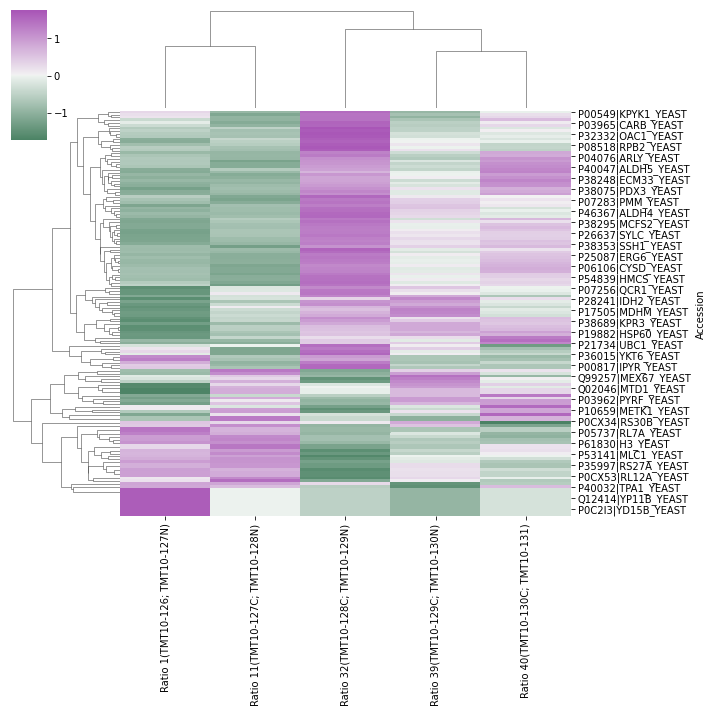

In [30]:
colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(data2cluster_merged,z_score=0,cmap=colors)

In [22]:
# To see differences among replicates
data2cluster=data[data.columns[15:25]] # combined data among replicates 
data2cluster.index=data.Accession

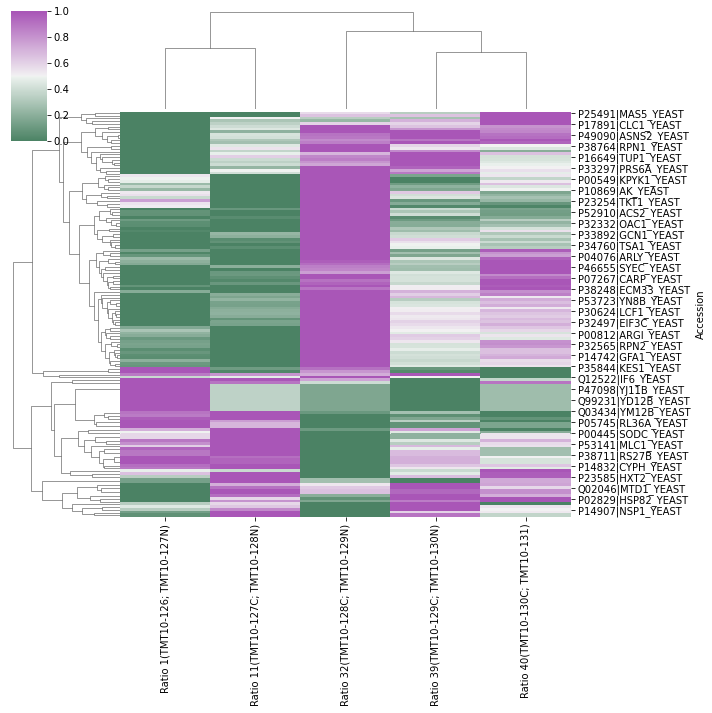

In [39]:
strains=['1', '11','32','39','40']
colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)


g=sns.clustermap(data2cluster,standard_scale=0,cmap=colors)

## Connect the masspec data with satay data 


## Enrichment analysis of the most significant fold change genes 